# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score
from sklearn.svm import SVC ,SVR
import warnings
warnings.filterwarnings("ignore")

# Data Collection

In [2]:
#loading the dataset to a Pandas DataFrame
apple_dataset = pd.read_csv('/Users/maorunrun/Desktop/projects/apple_quality/apple_quality.csv')

In [3]:
#number of rows & columns in the dataset
apple_dataset.shape

(4001, 9)

In [4]:
#first 5 rows of the dataset
apple_dataset.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [5]:
#Checking the dtypes of all the columns
apple_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [6]:
#Convert "Acidity" to a Numeric Data Type
apple_dataset['Acidity'] = pd.to_numeric(apple_dataset['Acidity'], errors='coerce')

In [7]:
apple_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB


In [8]:
#checking for missing values
apple_dataset.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        1
Quality        1
dtype: int64

In [9]:
#removing all the missing value column
apple_dataset = apple_dataset.dropna()

In [10]:
apple_dataset.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

No missing value now

# Data Analysis and Visulization

In [11]:
#statistical measures of the dataset
apple_dataset.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [12]:
#number of values for each quality
apple_dataset['Quality'].value_counts()

good    2004
bad     1996
Name: Quality, dtype: int64

In [13]:
# Drop columns ID , because we don't need it.
apple_dataset.drop(columns="A_id",inplace=True)

In [14]:
apple_dataset.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [15]:
# Correlation
correlation = apple_dataset.corr()

<AxesSubplot:>

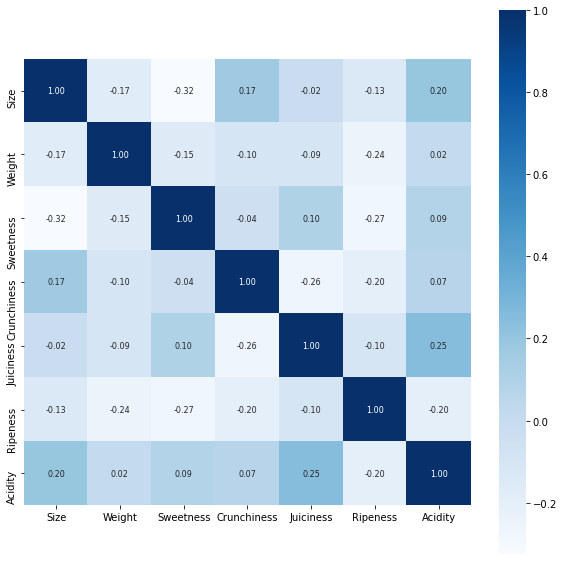

In [16]:
#constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.2f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

In [17]:
# making Group by

ave_qu = apple_dataset.groupby("Quality").mean()
ave_qu

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
Quality,,,,,,,
bad,-0.974358,-0.991828,-0.959195,1.002871,0.008871,0.994646,0.093151
good,-0.033553,-0.987274,0.016287,0.968154,1.013356,0.003890,0.060668


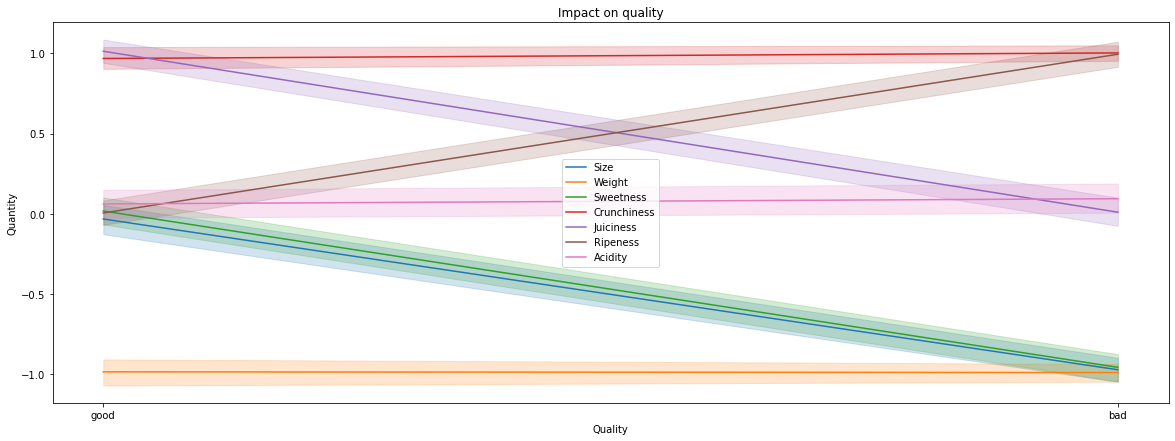

In [18]:
# let see the effect of element on the quality
plt.figure(figsize=(20,7))
sns.lineplot(data=apple_dataset, x="Quality",y="Size",label="Size")
sns.lineplot(data=apple_dataset, x="Quality",y="Weight",label="Weight")
sns.lineplot(data=apple_dataset, x="Quality",y="Sweetness",label="Sweetness")
sns.lineplot(data=apple_dataset, x="Quality",y="Crunchiness",label="Crunchiness")
sns.lineplot(data=apple_dataset, x="Quality",y="Juiciness",label="Juiciness")
sns.lineplot(data=apple_dataset, x="Quality",y="Ripeness",label="Ripeness")
sns.lineplot(data=apple_dataset, x="Quality",y="Acidity",label="Acidity")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

The elements highest effect on the quality of apples: Size, Sweetness, Juiciness, and Ripeness.

The elements lessnest effect on the quality of apples: Weight, Crunchiness and Acidity.

# Data Preprocessing

In [20]:
#separate the data and Label
X = apple_dataset.drop(['Quality'], axis=1)

In [21]:
print(X)

          Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0    -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1    -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2    -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3    -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...        ...       ...        ...          ...        ...       ...   
3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity  
0    -0.491590  
1    -0.722809  
2     2.621636  
3     0.790723  
4     0.501984  
...        ...  
3995

In [22]:
#convert "Quality" to a Numeric Data Type
Y = apple_dataset['Quality'].map({'bad':0, 'good':1})

In [23]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, Length: 4000, dtype: int64


In [24]:
#train & test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(Y.shape, Y_train.shape, Y_test.shape)

(4000,) (3200,) (800,)


# Building a Machine Learning Model

1 - Decision Tree Classifier

Model Training

In [33]:
# using the model Decision Tree Classifier
Tree_model=DecisionTreeClassifier(max_depth=10)

In [35]:
# fit model
Tree_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10)

Model Evaluation

In [36]:
#accuracy score
#accuracy on test data
Y_prediction_T =Tree_model.predict(X_test)
test_data_accuracy_T = accuracy_score(Y_test,Y_prediction_T)

In [37]:
print('Decision Tree - accuracy score : ', test_data_accuracy_T)

Decision Tree - accuracy score :  0.8225


<AxesSubplot:>

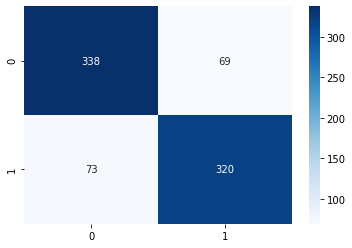

In [63]:
#confusion matrix
cmTree = confusion_matrix(Y_test, Y_prediction_T)
sns.heatmap(cmTree, annot=True, cmap='Blues', fmt='g')

2 - Random Forest Classifier

Model Training

In [38]:
#using the model random Forest classifier
RF_model = RandomForestClassifier()

In [39]:
# fit model
RF_model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

In [40]:
#accuracy score
#accuracy on test data
Y_prediction_RF = RF_model.predict(X_test)
test_data_accuracy_RF = accuracy_score(Y_test,Y_prediction_RF)

In [41]:
print('Random Forest - accuracy score : ', test_data_accuracy_RF)

Random Forest - accuracy score :  0.8875


<AxesSubplot:>

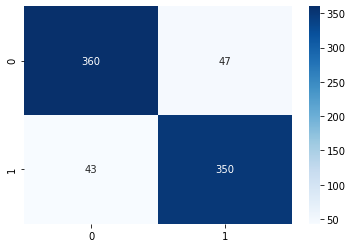

In [62]:
#confusion matrix
cmRF = confusion_matrix(Y_test, Y_prediction_RF)
sns.heatmap(cmRF, annot=True, cmap='Blues', fmt='g')

3 - Model SVC

Model Training

In [42]:
#using the model SVC
SVC_model=SVC(C=50,kernel="rbf")

In [43]:
# fit model
SVC_model.fit(X_train,Y_train)

SVC(C=50)

Model Evaluation

In [44]:
#accuracy score
#accuracy on test data
Y_prediction_SVC = SVC_model.predict(X_test)
test_data_accuracy_SVC = accuracy_score(Y_test,Y_prediction_SVC)

In [45]:
print('Model SVC - accuracy score : ', test_data_accuracy_SVC)

Model SVC - accuracy score :  0.92625


<AxesSubplot:>

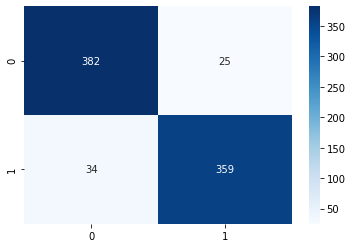

In [61]:
#confusion matrix
cmSVC = confusion_matrix(Y_test, Y_prediction_SVC)
sns.heatmap(cmSVC, annot=True, cmap='Blues', fmt='g')

4 -- Neighbors model

Model Training

In [46]:
# using the model K Neighbors Classifier
K_model = KNeighborsClassifier(n_neighbors = 5)

In [47]:
# fit model
K_model.fit(X_train, Y_train)

KNeighborsClassifier()

Model Evaluation

In [48]:
#accuracy score
#accuracy on test data
Y_prediction_K = K_model.predict(X_test)
test_data_accuracy_K = accuracy_score(Y_test,Y_prediction_K)

In [49]:
print('K Neighbors Classifier - accuracy score : ', test_data_accuracy_K)

K Neighbors Classifier - accuracy score :  0.89875


<AxesSubplot:>

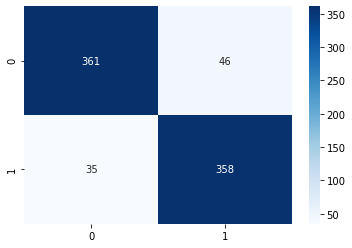

In [60]:
#confusion matrix
cmKNN = confusion_matrix(Y_test, Y_prediction_K)
sns.heatmap(cmKNN, annot=True, cmap='Blues', fmt='g')

The best model is SVC

# Building a Predictive System

In [56]:
input_data = (-0.300698281,-0.513603251,0.921006242,1.378172075,2.274746687,0.745336375,-2.93402889)

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [57]:
prediction_SVC = SVC_model.predict(input_data_reshaped)
print(prediction_SVC)

if (prediction_RF[0]==1):
    print('Good Quality Apple')
else:
    print('Bad Quality Apple')

[1]
Good Quality Apple
